In [1]:
import matplotlib.pyplot as plt; plt.style.use('seaborn-v0_8')
import numpy as np
from dql.agents.annealing import getAnnealingScheme
from dql.agents.exploration import ExplorationStrategy

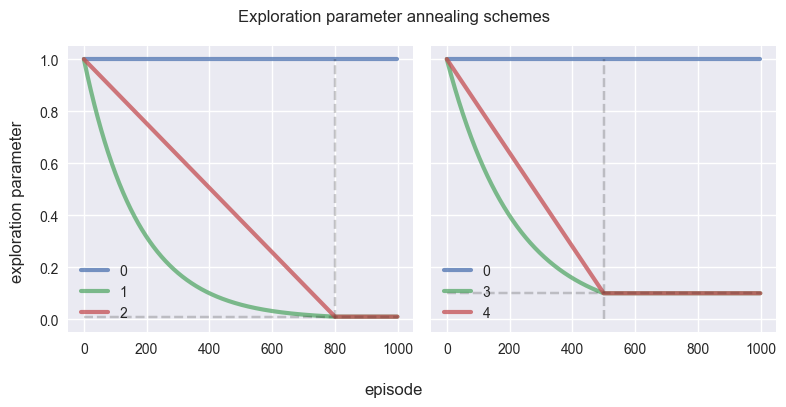

In [5]:
ne = 1000
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

eS0 = ExplorationStrategy(getAnnealingScheme(0, ne))
values0 = np.zeros(ne)
for j in range(ne):
    values0[j] = eS0.v
    eS0.anneal()

for i, ax in enumerate([ax1, ax1, ax2, ax2], start=1):
    scheme = getAnnealingScheme(i, ne)
    eS = ExplorationStrategy(scheme)
    values = np.zeros(ne)
    for j in range(ne):
        values[j] = eS.v
        eS.anneal()
    if i in [1, 3]:
        ax.plot(values0, linewidth=3, alpha=0.75, label='0')
    ax.plot(values, linewidth=3, alpha=0.75, label=str(i))
    ax.hlines(scheme.endVal, 0, ne, linestyles='dashed', colors='black', alpha=0.1)
    ax.vlines(scheme.window*ne, 0, 1, linestyles='dashed', colors='black', alpha=0.1)

ax1.legend()
ax2.legend()
fig.supxlabel('episode')
fig.supylabel('exploration parameter')
fig.suptitle('Exploration parameter annealing schemes')
fig.tight_layout();